In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
df_train = pd.read_csv('C:/Users/USER/Documents/Eugenius/Projects/Predict-Podcast-Listening-Time/train.csv')
df_test  = pd.read_csv('C:/Users/USER/Documents/Eugenius/Projects/Predict-Podcast-Listening-Time/test.csv')
df_sub = pd.read_csv('C:/Users/USER/Documents/Eugenius/Projects/Predict-Podcast-Listening-Time/sample_submission.csv')

In [4]:
df_train.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [5]:
df_train.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,750000.000000,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,374999.500000,64.504738,59.859901,52.236449,1.348855,45.437406
std,216506.495284,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000
25%,187499.750000,35.730000,39.410000,28.380000,0.000000,23.178350
50%,374999.500000,63.840000,60.050000,53.580000,1.000000,43.379460
75%,562499.250000,94.070000,79.530000,76.600000,2.000000,64.811580
max,749999.000000,325.240000,119.460000,119.910000,103.910000,119.970000


In [6]:
df_test.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral


In [7]:
df_sub.head()

,id,Listening_Time_minutes
0,750000,45.437
1,750001,45.437
2,750002,45.437
3,750003,45.437
4,750004,45.437


In [8]:
df_train.drop(columns=['id'], inplace=True)
df_test.drop(columns=['id'], inplace=True)


In [9]:
df_train.shape,df_test.shape

((750000, 11), (250000, 10))

In [10]:
df_train.isnull().sum()

Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [11]:
df_test.isnull().sum()

Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes         28736
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage    48832
Number_of_Ads                      0
Episode_Sentiment                  0
dtype: int64

In [12]:
df_train.shape,df_test.shape,df_sub.shape

((750000, 11), (250000, 10), (250000, 2))

In [14]:
df_train.select_dtypes(include=[np.number]).corr()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
Episode_Length_minutes,1.000000,0.023596,-0.009704,-0.054953,0.916749
Host_Popularity_percentage,0.023596,1.000000,0.022431,-0.017896,0.050870
Guest_Popularity_percentage,-0.009704,0.022431,1.000000,0.007933,-0.016014
Number_of_Ads,-0.054953,-0.017896,0.007933,1.000000,-0.118337
Listening_Time_minutes,0.916749,0.050870,-0.016014,-0.118337,1.000000


In [15]:
df_train.dtypes

Podcast_Name                    object
Episode_Title                   object
Episode_Length_minutes         float64
Genre                           object
Host_Popularity_percentage     float64
Publication_Day                 object
Publication_Time                object
Guest_Popularity_percentage    float64
Number_of_Ads                  float64
Episode_Sentiment               object
Listening_Time_minutes         float64
dtype: object

In [16]:
common_cols = df_train.columns.intersection(df_test.columns)

numerical_cols = df_train[common_cols].select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_train[common_cols].select_dtypes(include=['object']).columns

df_train[numerical_cols] = df_train[numerical_cols].fillna(df_train[numerical_cols].median())
df_test[numerical_cols] = df_test[numerical_cols].fillna(df_train[numerical_cols].median())
df_train[categorical_cols] = df_train[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))
df_test[categorical_cols] = df_test[categorical_cols].apply(lambda x: x.fillna(df_train[x.name].mode()[0]))

In [17]:
common_cols = df_train.columns.intersection(df_test.columns)
categorical_cols = df_train[common_cols].select_dtypes(include=['object']).columns

In [18]:
y = df_train['Listening_Time_minutes'] 

In [20]:
df_train = pd.read_csv('C:/Users/USER/Documents/Eugenius/Projects/Predict-Podcast-Listening-Time/train.csv')
df_test  = pd.read_csv('C:/Users/USER/Documents/Eugenius/Projects/Predict-Podcast-Listening-Time/test.csv')

In [21]:
X = df_train
X_test = df_test

In [26]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
import gc
from category_encoders import TargetEncoder
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor, Pool
import xgboost as xgb

In [ ]:
X = df_train.drop('Listening_Time_minutes', axis=1)  
encoded_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

xgb_params = {
    'n_estimators': 300,
    'max_depth': 14,
    'learning_rate': 0.04222221,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42,    
    'tree_method': 'hist',
    'n_jobs': -1  
}

n_splits = 3
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
scores = []
test_preds = np.zeros(len(X_test)) 

for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
    print(f"Training fold {fold + 1}/{n_splits}...")    
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]   
    
    model = xgb.XGBRegressor(**xgb_params)
    
    model.fit(X_train, y_train, verbose=100)
    
    val_pred = model.predict(X_val)
    score = rmse(y_val, val_pred)
    scores.append(score)
    test_preds += model.predict(X_test) / n_splits      
    print(f"Fold {fold + 1} RMSE: {score:.4f}")

print(f'Optimized Cross-validated RMSE score: {np.mean(scores):.3f} +/- {np.std(scores):.3f}')
print(f'Max RMSE score: {np.max(scores):.3f}')
print(f'Min RMSE score: {np.min(scores):.3f}')

Training fold 1/3...
Fold 1 RMSE: 12.9032
Training fold 2/3...
Fold 2 RMSE: 12.9098
Training fold 3/3...
Fold 3 RMSE: 12.8875
Optimized Cross-validated RMSE score: 12.900 +/- 0.009
Max RMSE score: 12.910
Min RMSE score: 12.887


C:\Users\USER\AppData\Local\Temp\ipykernel_23876\2553307485.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis", ax=axes[0, 0])


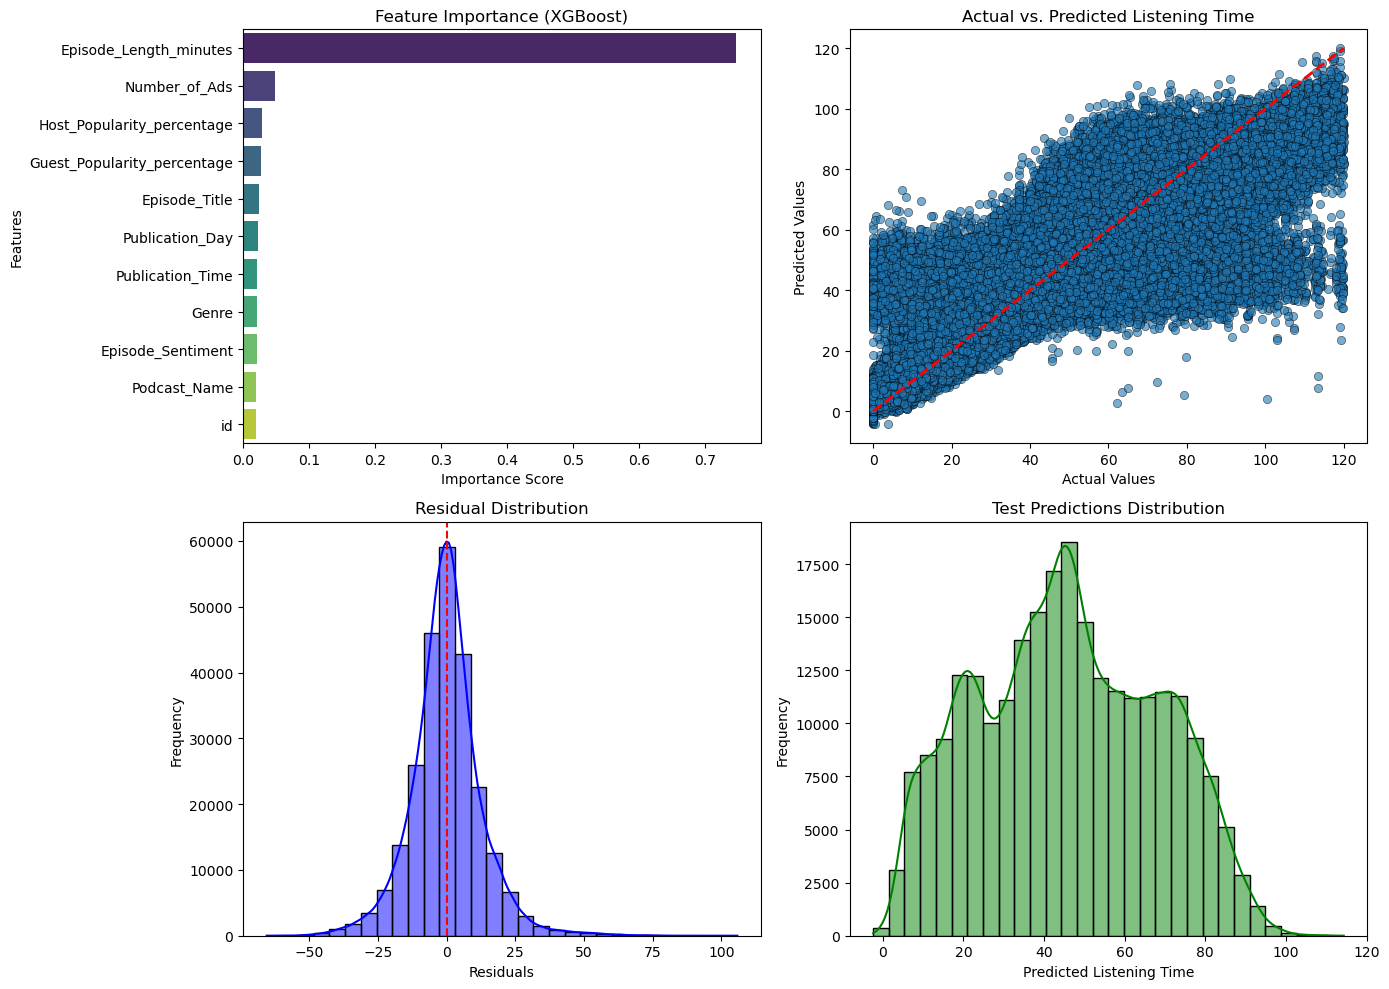

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

feature_importance = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis", ax=axes[0, 0])
axes[0, 0].set_title("Feature Importance (XGBoost)")
axes[0, 0].set_xlabel("Importance Score")
axes[0, 0].set_ylabel("Features")

sns.scatterplot(x=y_val, y=val_pred, alpha=0.6, edgecolors="k", ax=axes[0, 1])
axes[0, 1].plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], '--r', linewidth=2) 
axes[0, 1].set_title("Actual vs. Predicted Listening Time")
axes[0, 1].set_xlabel("Actual Values")
axes[0, 1].set_ylabel("Predicted Values")

residuals = y_val - val_pred
sns.histplot(residuals, bins=30, kde=True, color='blue', ax=axes[1, 0])
axes[1, 0].axvline(0, color='red', linestyle='--')
axes[1, 0].set_title("Residual Distribution")
axes[1, 0].set_xlabel("Residuals")
axes[1, 0].set_ylabel("Frequency")

sns.histplot(test_preds, bins=30, kde=True, color='green', ax=axes[1, 1])
axes[1, 1].set_title("Test Predictions Distribution")
axes[1, 1].set_xlabel("Predicted Listening Time")
axes[1, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [37]:

df_sub.head()

,id,Listening_Time_minutes
0,750000,45.437
1,750001,45.437
2,750002,45.437
3,750003,45.437
4,750004,45.437


In [38]:
df_sub['Listening_Time_minutes'] = test_preds

In [39]:
df_sub.to_csv('submission.csv', index=False)

In [40]:
df_sub.head()

,id,Listening_Time_minutes
0,750000,55.837896
1,750001,22.391729
2,750002,53.494503
3,750003,70.909498
4,750004,47.768003


<Axes: >

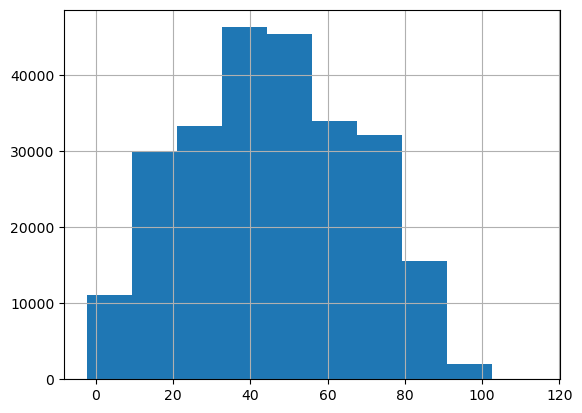

In [41]:
df_sub['Listening_Time_minutes'].hist()